In [2]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
%matplotlib inline

In [6]:
# Importing training data
df=pd.read_csv('fetal_health.csv')

In [7]:
# Checking dataset
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [8]:
# Checking the Shape of Data
df.shape 

(2126, 22)

In [9]:
# Creating a new dataset of target Variable alone
df_tar = pd.DataFrame()
df_tar['fetal_health'] = df['fetal_health']
df_tar.sample()

,fetal_health
1627,1.0


In [10]:
# Checking for null values in the target variable
for i in df_tar.columns:
    print(i,'=',df_tar[i].isnull().sum(),df_tar[i].dtype)

fetal_health = 0 float64


In [11]:
# Checking whether the index is unique and in order
df.index.is_unique

True

In [12]:
# Checking for false indexes
df.index.duplicated()

array([False, False, False, ..., False, False, False])

In [13]:
# Viewing the sample of the dataframe
df.sample(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1690,137.0,0.012,0.000,0.003,0.004,0.0,0.000,56.0,2.1,0.0,...,52.0,188.0,3.0,0.0,160.0,144.0,161.0,39.0,1.0,1.0
897,144.0,0.000,0.000,0.006,0.000,0.0,0.000,32.0,1.0,0.0,...,122.0,160.0,1.0,0.0,150.0,147.0,149.0,2.0,1.0,1.0
1519,133.0,0.003,0.000,0.007,0.002,0.0,0.000,28.0,1.4,0.0,...,109.0,163.0,3.0,0.0,140.0,138.0,139.0,9.0,0.0,1.0
304,145.0,0.000,0.020,0.000,0.000,0.0,0.000,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
1566,145.0,0.003,0.000,0.006,0.000,0.0,0.000,48.0,0.7,2.0,...,133.0,171.0,2.0,0.0,160.0,159.0,160.0,2.0,1.0,1.0
1701,137.0,0.007,0.001,0.004,0.003,0.0,0.000,57.0,1.4,0.0,...,69.0,178.0,4.0,0.0,146.0,143.0,149.0,43.0,1.0,1.0
1116,122.0,0.000,0.000,0.001,0.001,0.0,0.000,25.0,1.4,3.0,...,105.0,136.0,1.0,0.0,126.0,122.0,124.0,5.0,0.0,1.0
198,145.0,0.003,0.000,0.002,0.000,0.0,0.000,49.0,0.6,0.0,...,145.0,171.0,1.0,0.0,154.0,157.0,158.0,4.0,0.0,1.0
1765,120.0,0.000,0.000,0.005,0.009,0.0,0.001,62.0,1.5,0.0,...,69.0,154.0,5.0,1.0,86.0,102.0,101.0,64.0,-1.0,3.0
2082,130.0,0.000,0.009,0.006,0.000,0.0,0.000,72.0,2.6,5.0,...,124.0,151.0,1.0,0.0,130.0,127.0,131.0,1.0,-1.0,1.0


In [14]:
# Dedcribing the properties of the features of the dataset
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [15]:
# Getting the shape of the dataset
df.shape 

(2126, 22)

In [16]:
# Checking for data correlation 
df.corr()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


In [17]:
# Getting detail on the feature of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

<Axes: >

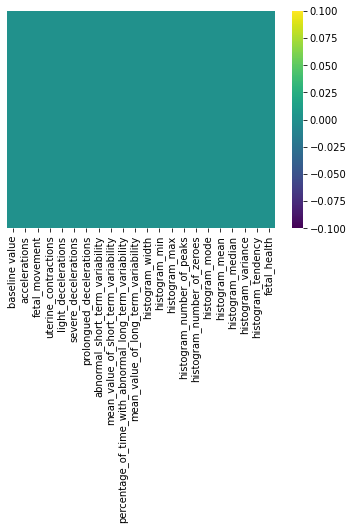

In [18]:
# Checking visually for missing values
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [19]:
# Checking for missing values
for i in df.columns:
    print(i,'=',df[i].isnull().sum(),df[i].dtype)

baseline value = 0 float64
accelerations = 0 float64
fetal_movement = 0 float64
uterine_contractions = 0 float64
light_decelerations = 0 float64
severe_decelerations = 0 float64
prolongued_decelerations = 0 float64
abnormal_short_term_variability = 0 float64
mean_value_of_short_term_variability = 0 float64
percentage_of_time_with_abnormal_long_term_variability = 0 float64
mean_value_of_long_term_variability = 0 float64
histogram_width = 0 float64
histogram_min = 0 float64
histogram_max = 0 float64
histogram_number_of_peaks = 0 float64
histogram_number_of_zeroes = 0 float64
histogram_mode = 0 float64
histogram_mean = 0 float64
histogram_median = 0 float64
histogram_variance = 0 float64
histogram_tendency = 0 float64
fetal_health = 0 float64


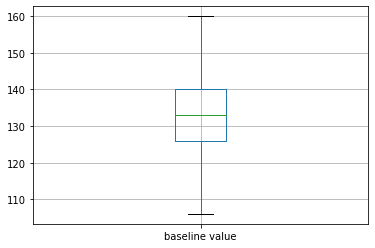

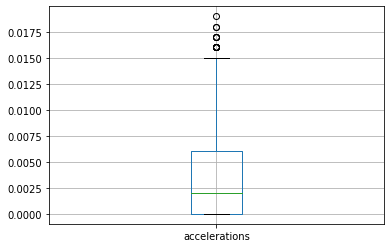

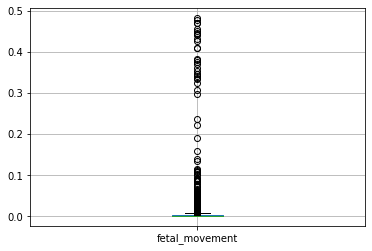

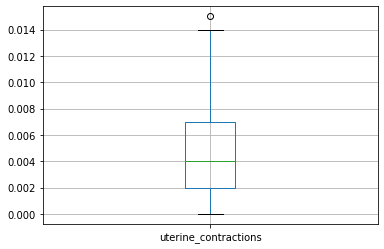

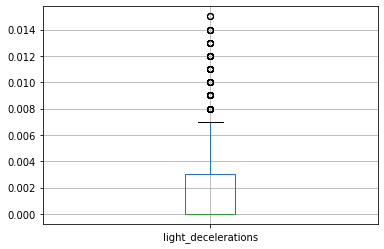

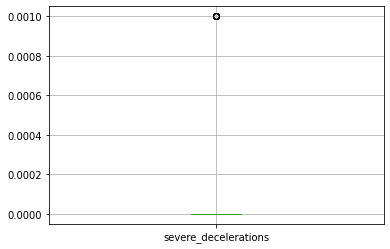

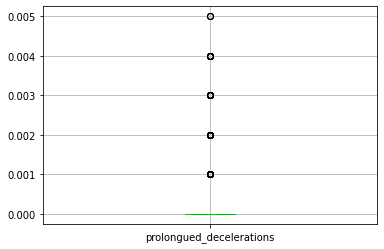

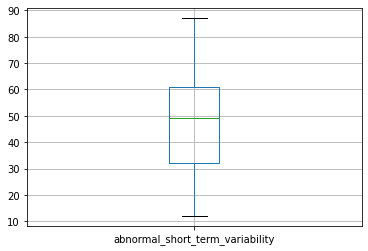

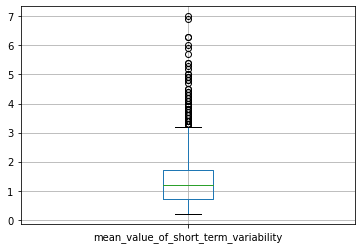

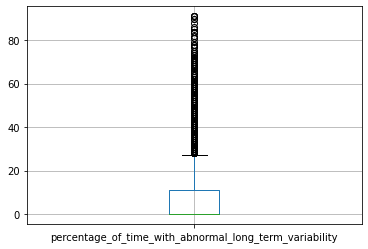

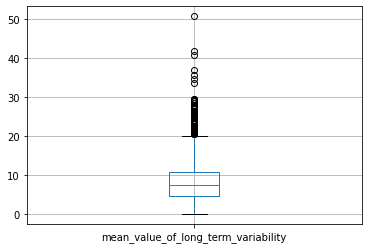

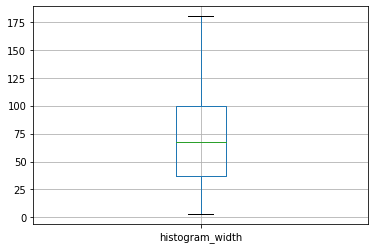

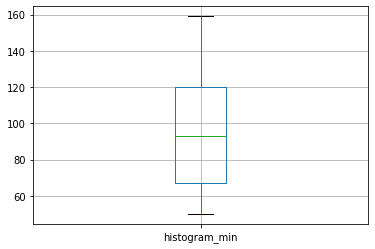

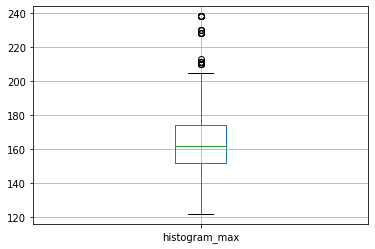

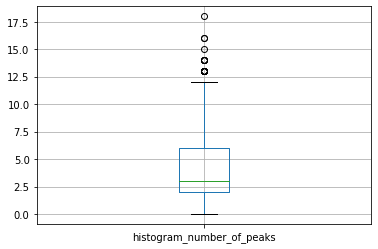

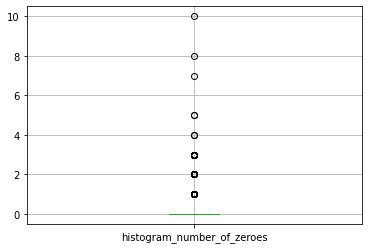

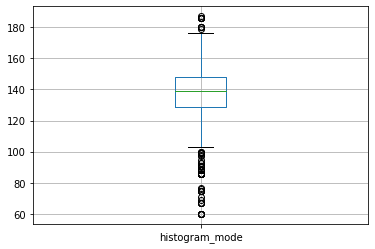

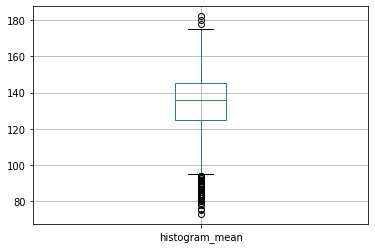

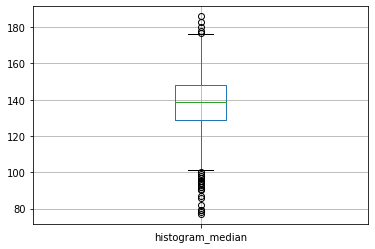

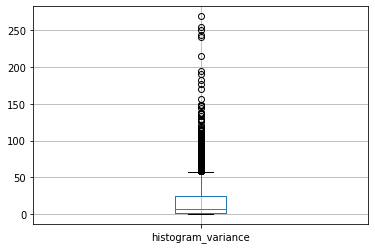

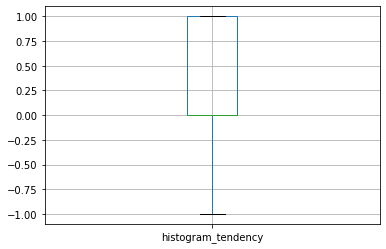

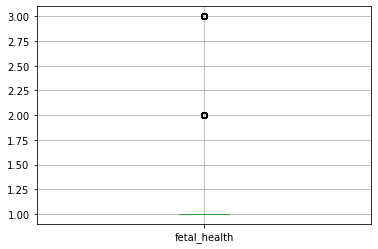

In [20]:
# Checking for Outliers via visualization:
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        plt.figure()
        df.boxplot([col])
        plt.show()

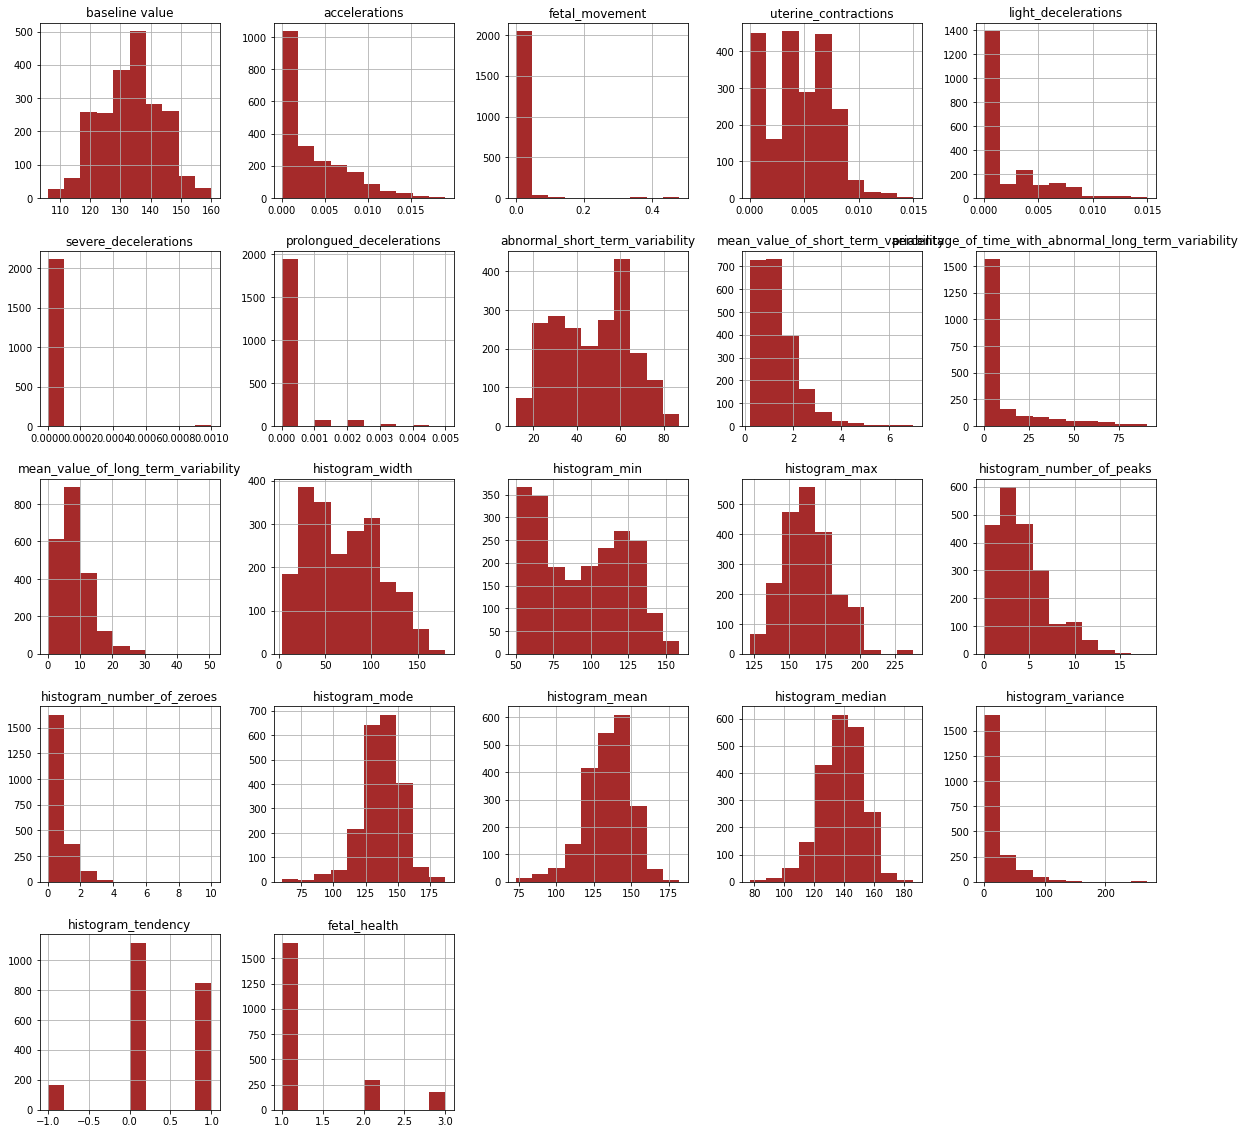

In [21]:
# Visualization of features to check the spread of data:
fig = df.hist(figsize = (20,20),color="brown")

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'baseline value'),
  Text(0, 1.5, 'accelerations'),
  Text(0, 2.5, 'fetal_movement'),
  Text(0, 3.5, 'uterine_contractions'),
  Text(0, 4.5, 'light_decelerations'),
  Text(0, 5.5, 'severe_decelerations'),
  Text(0, 6.5, 'prolongued_decelerations'),
  Text(0, 7.5, 'abnormal_short_term_variability'),
  Text(0, 8.5, 'mean_value_of_short_term_variability'),
  Text(0, 9.5, 'percentage_of_time_with_abnormal_long_term_variability'),
  Text(0, 10.5, 'mean_value_of_long_term_variability'),
  Text(0, 11.5, 'histogram_width'),
  Text(0, 12.5, 'histogram_min'),
  Text(0, 13.5, 'histogram_max'),
  Text(0, 14.5, 'histogram_number_of_peaks'),
  Text(0, 15.5, 'histogram_number_of_zeroes'),
  Text(0, 16.5, 'histogram_mode'),
  Text(0, 17.5, 'histogram_mean'),
  Text(0, 18.5, 'histogram_median'),
  Text(0, 19.5, 'histogram_variance'),
  Text

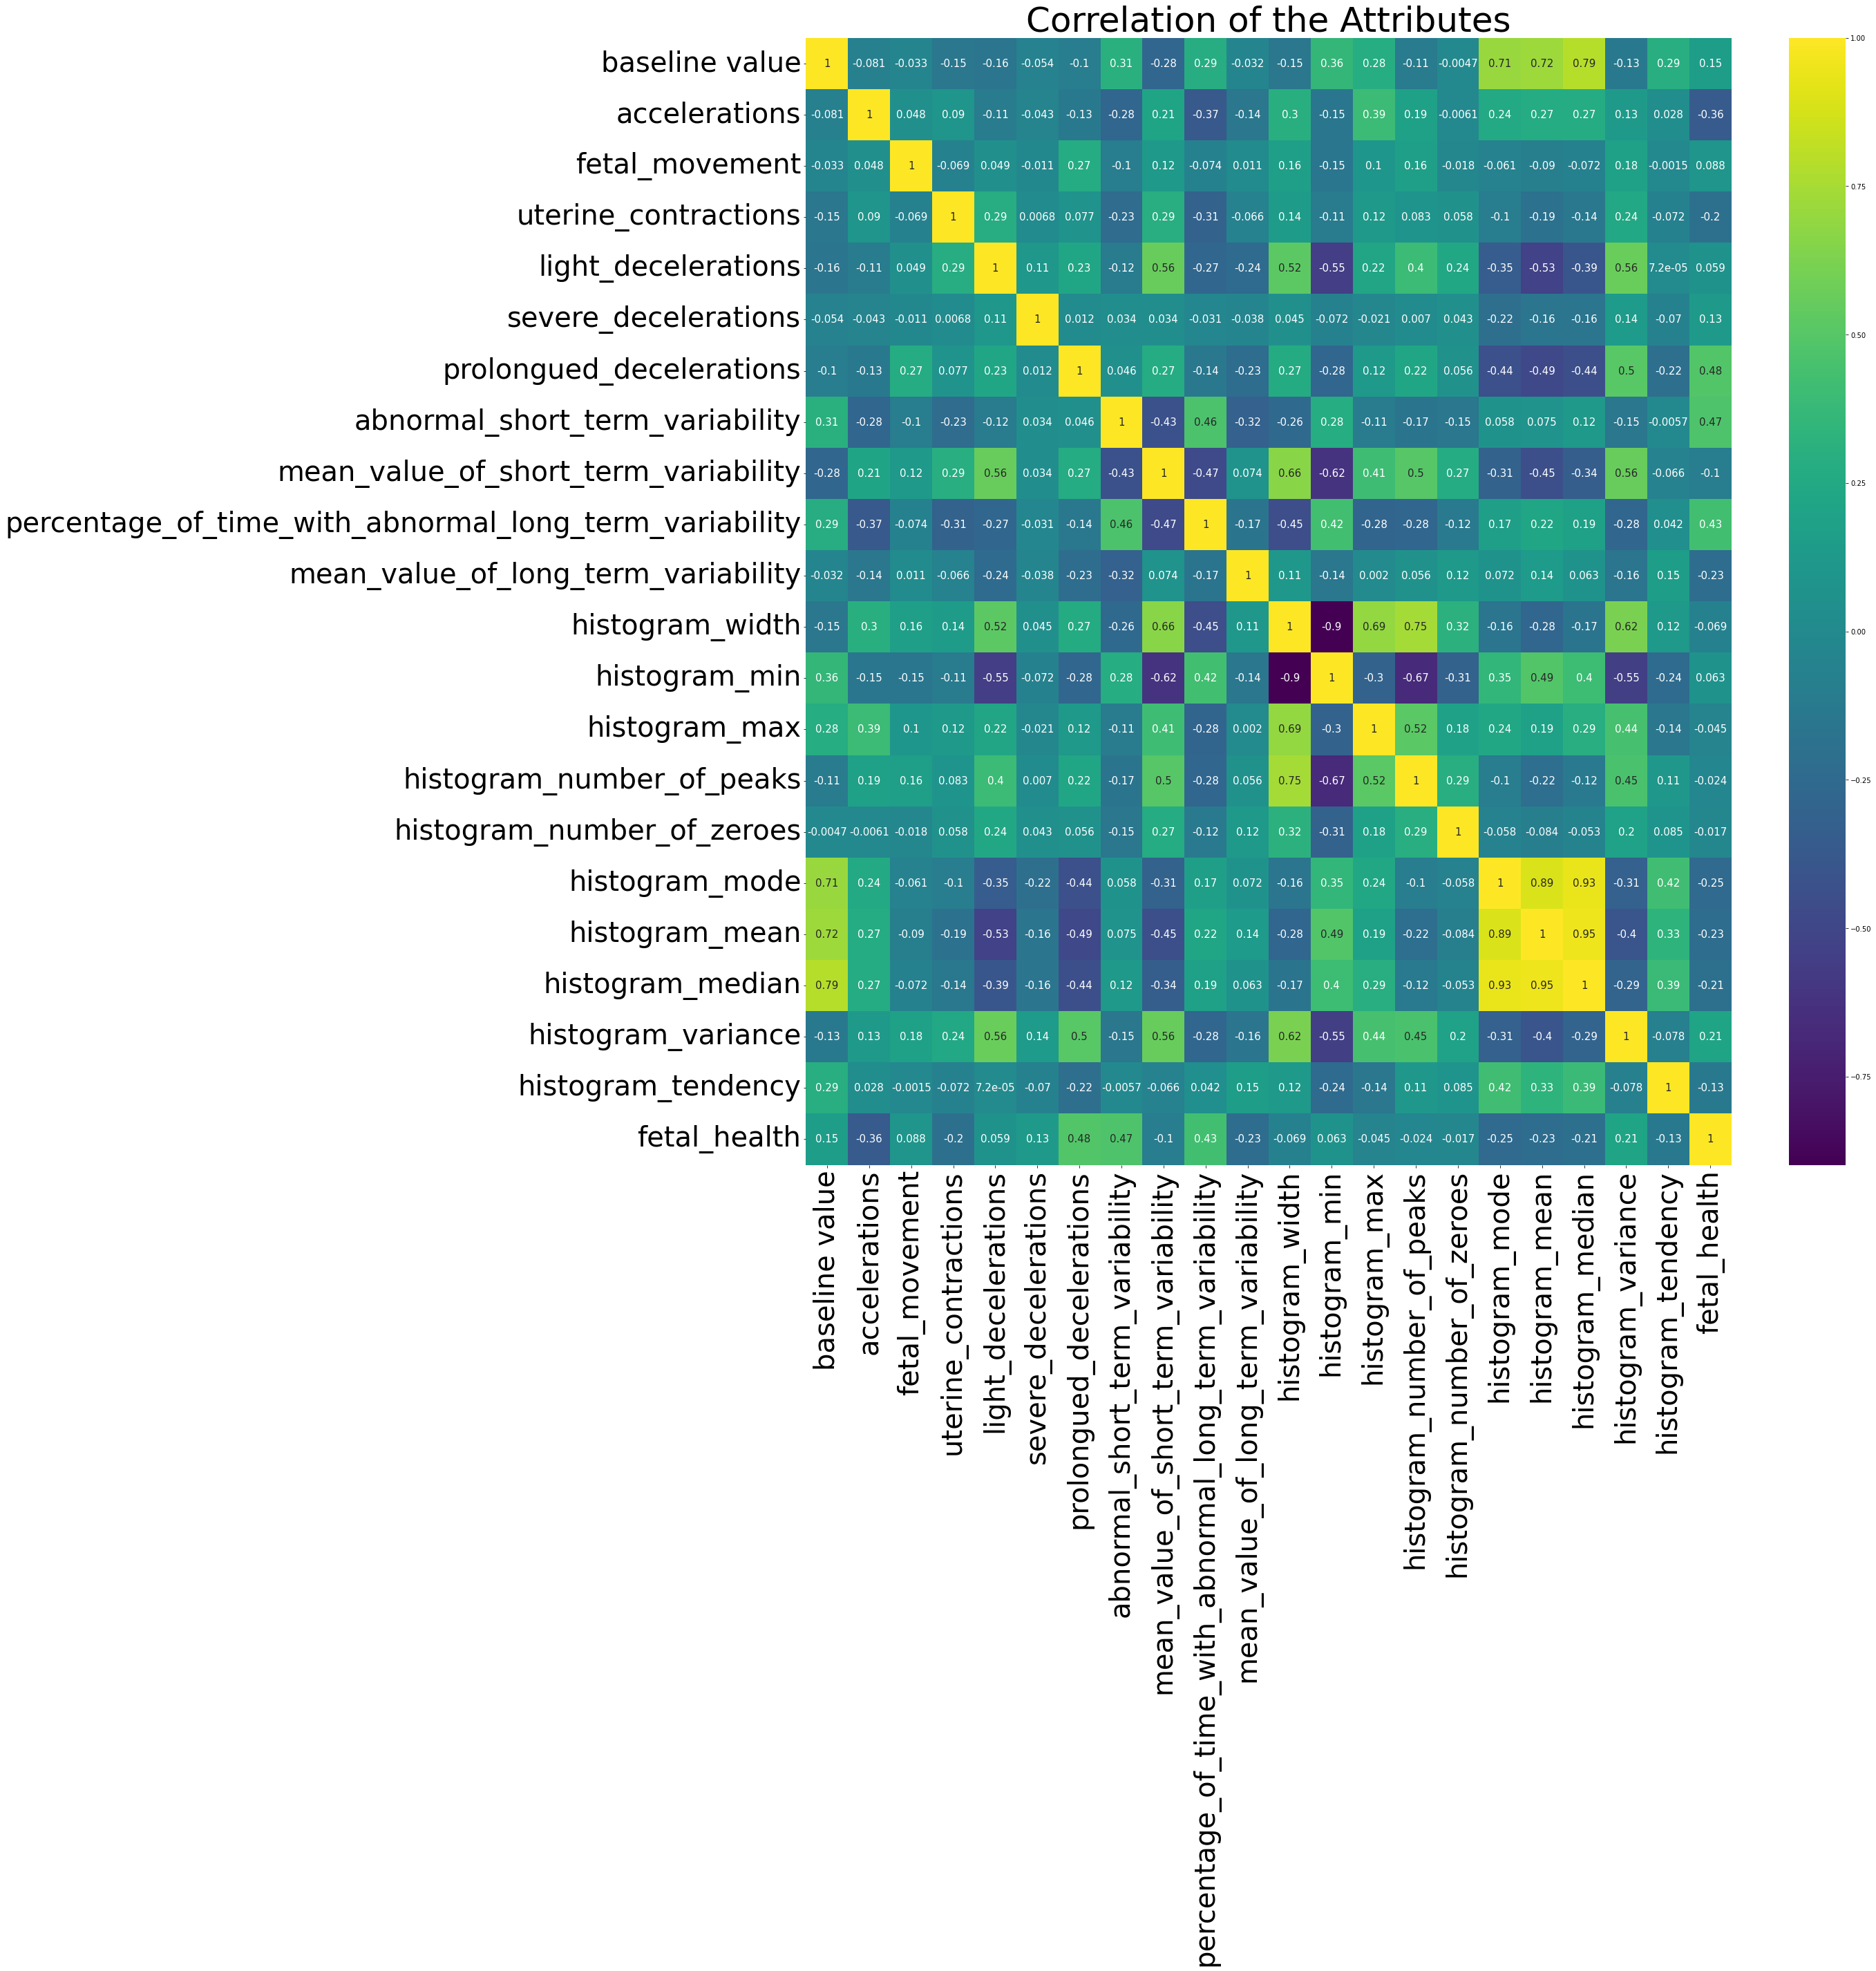

In [22]:
# Visualization of data correlation using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 15},cmap="viridis")
plt.title('Correlation of the Attributes',fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

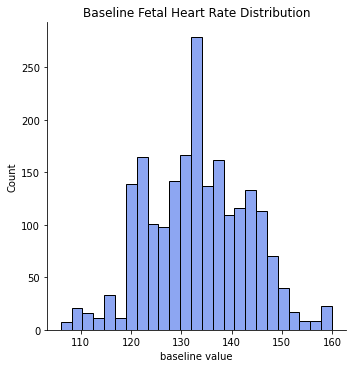

In [23]:
# Visualization of Baseline Fetal Heart Rate Distribution
sns.set_palette(palette="coolwarm")
sns.displot(df['baseline value'])
plt.title('Baseline Fetal Heart Rate Distribution');

In [24]:
# Checking for Unique Values in the dataset
for col in df.columns:
    print(col,'=',df[col].nunique())

baseline value = 48
accelerations = 20
fetal_movement = 102
uterine_contractions = 16
light_decelerations = 16
severe_decelerations = 2
prolongued_decelerations = 6
abnormal_short_term_variability = 75
mean_value_of_short_term_variability = 57
percentage_of_time_with_abnormal_long_term_variability = 87
mean_value_of_long_term_variability = 249
histogram_width = 154
histogram_min = 109
histogram_max = 86
histogram_number_of_peaks = 18
histogram_number_of_zeroes = 9
histogram_mode = 88
histogram_mean = 103
histogram_median = 95
histogram_variance = 133
histogram_tendency = 3
fetal_health = 3


In [25]:
# Printing the columns of the dataframe
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [26]:
# Printing the unique values of fetal_health column
df['fetal_health'].unique()

array([2., 1., 3.])

In [27]:
# engineering new categorical target column for Normal and At Risk fetal health
df['fetal_health'].replace([1.000, 2.000, 3.000],[0, 1, 2],inplace=True)

Text(0.5, 1.0, 'Prolonged Decelerations and Fetal Health Outcomes')

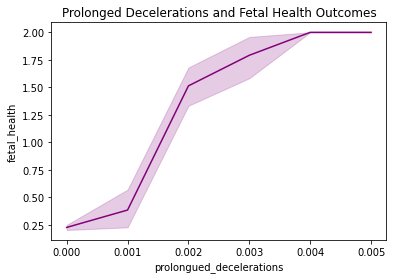

In [29]:
# Visualization of Prolonged Decelerations Vs Fetal Health Outcomes
sns.set_palette(palette="RdPu_r")
sns.lineplot(x='prolongued_decelerations',y='fetal_health', data=df, alpha=1.0)
plt.title('Prolonged Decelerations and Fetal Health Outcomes')

Text(0.5, 1.0, 'Prolonged Decelerations and Fetal Heart Rate')

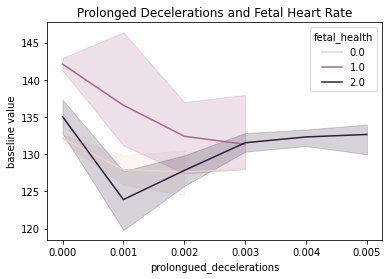

In [31]:
# Visualization of Prolonged Decelerations Vs Fetal Heart Rate
sns.set_palette(palette="RdPu")
sns.lineplot(x='prolongued_decelerations',y='baseline value',hue='fetal_health', data=df, alpha=1.0)
plt.title('Prolonged Decelerations and Fetal Heart Rate')

In [32]:
# Seperating Independent and Dependent Variables
x=df.drop(labels=['fetal_health'],axis=1)
y=df[['fetal_health']]

<Axes: xlabel='fetal_health'>

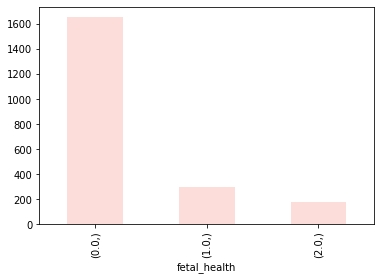

In [33]:
# Checking for balance distribution of the dataframe
y.value_counts().plot.bar()

In [34]:
# Creating a data balancing module
sm = SMOTE()

In [35]:
# Balancing the dataset
X, Y = sm.fit_resample(x,y)

<Axes: xlabel='fetal_health'>

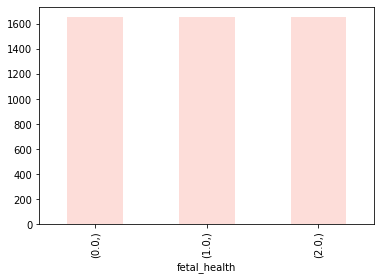

In [36]:
# Checking for balance distribution of the dataframe
Y.value_counts().plot.bar()

In [37]:
# Seperating Training and Testing Data for Model Building
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2)

In [38]:
# Decision Tree model build 
dTreep=DecisionTreeClassifier(max_depth=5)
# Model Fitting
dTreep.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [39]:
# Accuracy Testing
dtptr=dTreep.score(x_train,y_train)
print('Train Score:',dtptr)
dtpte=dTreep.score(x_test,y_test)
print('Test Score: ',dtpte)

Train Score: 0.926233635448137
Test Score:  0.9113796576032226


In [40]:
# Random Forest Model Build
rf = RandomForestClassifier(n_estimators = 100)
# Model Fitting
rf.fit(x_train, y_train)

<ipython-input-40-4908452cbcd7>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestClassifier()

In [41]:
# Accuracy Testing
rftr=rf.score(x_train,y_train)
print('Train Score:',rftr)
rfte=rf.score(x_test,y_test)
print('Test Score: ',rfte)

Train Score: 0.9997482376636455
Test Score:  0.9788519637462235


In [42]:
# Random Forest Model Build
lr = LogisticRegression()
# Model Fitting
lr.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
# Accuracy Testing
lrtr=lr.score(x_train,y_train)
print('Train Score:',lrtr)
lrte=lr.score(x_test,y_test)
print('Test Score: ',lrte)

Train Score: 0.7978348439073515
Test Score:  0.7955689828801611


In [44]:
# XGBoost Classifier Model Build
xgb = XGBClassifier(n_estimators = 100)
# Model Fitting
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [45]:
# Accuracy Testing
xgbtr=xgb.score(x_train,y_train)
print('Train Score:',xgbtr)
xgbte=xgb.score(x_test,y_test)
print('Test Score: ',xgbte)

Train Score: 0.9997482376636455
Test Score:  0.9838872104733132


In [46]:
# Gaussian Naive Bayes Model
gnb = GaussianNB()
# Model Fitting
gnb.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [47]:
# Accuracy Testing
gnbtr=gnb.score(x_train,y_train)
print('Train Score:',gnbtr)
gnbte=gnb.score(x_test,y_test)
print('Test Score: ',gnbte)

Train Score: 0.7648539778449144
Test Score:  0.770392749244713


In [49]:
print('Decision Tree Model:')
print('Train Score:',dtptr)
print('Test Score: ',dtpte)
print('Random Forest Model:')
print('Train Score:',rftr)
print('Test Score: ',rfte)
print('Logistic Regressor Model:')
print('Train Score:',lrtr)
print('Test Score: ',lrte)
print('XGBoost Classifier Model:')
print('Train Score:',xgbtr)
print('Test Score: ',xgbte)
print('Gaussian Naive Bayes Model:')
print('Train Score:',gnbtr)
print('Test Score: ',gnbte)
# print('Support Vector Classifier Model:')
# print('Train Score:',svctr)
# print('Test Score: ',svcte)

Decision Tree Model:
Train Score: 0.926233635448137
Test Score:  0.9113796576032226
Random Forest Model:
Train Score: 0.9997482376636455
Test Score:  0.9788519637462235
Logistic Regressor Model:
Train Score: 0.7978348439073515
Test Score:  0.7955689828801611
XGBoost Classifier Model:
Train Score: 0.9997482376636455
Test Score:  0.9838872104733132
Gaussian Naive Bayes Model:
Train Score: 0.7648539778449144
Test Score:  0.770392749244713


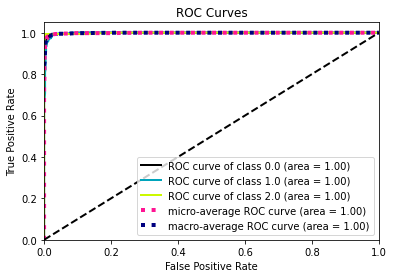

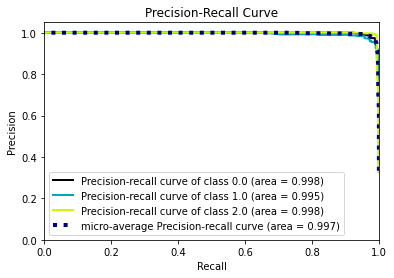

In [50]:
# Plotting the Metrics of Random Forest Model
y_score = rf.predict_proba(x_test)
y_pred = rf.predict(x_test)

plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

In [51]:
# Printing the Accuracy Random Forest Model
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9788519637462235


In [52]:
# Classify test data and display score and report of Random Forest Model
predicted = rf.predict(x_test)
score = 100.0 * metrics.accuracy_score(y_test, predicted)
print(f'Random Forest Model Score = {score:4.1f}%\n')
print(f'Classification Report:\n {metrics.classification_report(y_test, predicted)}\n')

Random Forest Model Score = 97.9%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       341
         1.0       0.96      0.98      0.97       325
         2.0       0.99      0.99      0.99       327

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993




In [53]:
y_pred_class = rf.predict(x_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[330  10   1]
 [  5 318   2]
 [  0   3 324]]


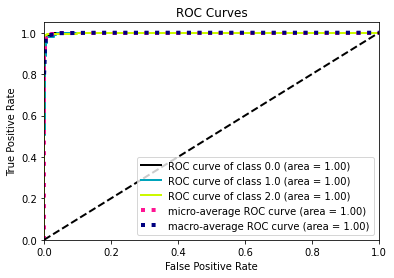

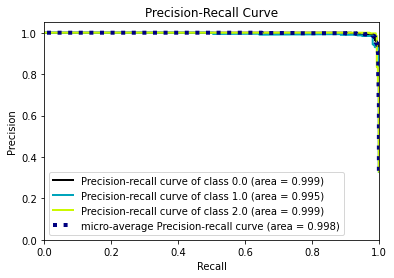

In [54]:
# Plotting the Metrics of XGBoost Classifier Model
y_score = xgb.predict_proba(x_test)
y_pred = xgb.predict(x_test)

plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

In [55]:
# Printing the Accuracy XGBoost Classifier Model
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9838872104733132


In [56]:
# Classify test data and display score and report of XGBoost Classifier Model
predicted = xgb.predict(x_test)
score = 100.0 * metrics.accuracy_score(y_test, predicted)
print(f'XGBoost Classifier Model Score = {score:4.1f}%\n')
print(f'Classification Report:\n {metrics.classification_report(y_test, predicted)}\n')

XGBoost Classifier Model Score = 98.4%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       341
         1.0       0.97      0.98      0.98       325
         2.0       0.99      0.99      0.99       327

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993




(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspicion'), Text(0, 2.5, 'At Risk')])

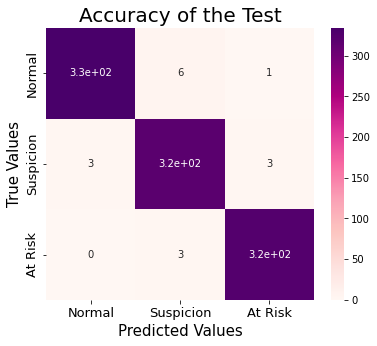

In [57]:
# Printing the Confusion Matrix of XGBoost Classifier Model
y_pred_class = xgb.predict(x_test)
plt.figure(figsize=(6,5))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_class),annot=True,xticklabels = ['Normal', 'Suspicion','At Risk'] , yticklabels = ['Normal', 'Suspicion','At Risk'],cmap='RdPu' ) 
plt.ylabel('True Values',fontsize=15)
plt.xlabel('Predicted Values',fontsize=15)
plt.title('Accuracy of the Test',fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

In [58]:
# Saving the XGBoost Classifier Model
data={"Model": xgb}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [59]:
# Checking the saved model
with open('saved_steps.pkl','rb') as file:
    data = pickle.load(file)

model=data["Model"]

In [60]:
# Storing one entry of the testing dataset
test=x_test.iloc[9:10,:]

In [61]:
# Checking the data
test

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
3807,133.0,0.001,0.0,0.009255,0.004,0.0,0.002,60.254898,2.77451,0.0,...,128.274491,55.725509,184.0,7.235306,0.0,125.0,97.490204,105.529389,97.039185,0.0


In [62]:
# Storing the data for testing purposes
test.to_csv('test_csv.csv',index=0)

In [63]:
# Replacing the values of fetal health column for easier access
Y['fetal_health'].replace([0, 1, 2],['Normal', 'Suspicion', 'At Risk'],inplace=True)

In [64]:
# creating a balanced dataframe DF
DF=X

In [65]:
# Adding the fetal health column to the dataframe
DF['Fetal Health']=Y['fetal_health']

In [66]:
# Checking the dataframe
DF

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,Fetal Health
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,73.000000,0.500000,43.0,...,62.000000,126.000000,2.000000,0.000000,120.000000,137.000000,121.000000,73.000000,1.000000,Suspicion
1,132.000000,0.006000,0.000000,0.006000,0.003000,0.0,0.000000,17.000000,2.100000,0.0,...,68.000000,198.000000,6.000000,1.000000,141.000000,136.000000,140.000000,12.000000,0.000000,Normal
2,133.000000,0.003000,0.000000,0.008000,0.003000,0.0,0.000000,16.000000,2.100000,0.0,...,68.000000,198.000000,5.000000,1.000000,141.000000,135.000000,138.000000,13.000000,0.000000,Normal
3,134.000000,0.003000,0.000000,0.008000,0.003000,0.0,0.000000,16.000000,2.400000,0.0,...,53.000000,170.000000,11.000000,0.000000,137.000000,134.000000,137.000000,13.000000,1.000000,Normal
4,132.000000,0.007000,0.000000,0.008000,0.000000,0.0,0.000000,16.000000,2.400000,0.0,...,53.000000,170.000000,9.000000,0.000000,137.000000,136.000000,138.000000,11.000000,1.000000,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,129.010013,0.000673,0.000000,0.006653,0.008485,0.0,0.000673,63.168336,3.812828,0.0,...,66.000000,161.050066,5.673342,0.000000,72.198375,78.218402,115.979973,124.801625,-0.168336,At Risk
4961,133.000000,0.001000,0.000000,0.009000,0.003458,0.0,0.002542,60.542300,2.691540,0.0,...,54.288502,184.000000,7.457700,0.000000,125.000000,96.915401,102.915401,102.049894,0.000000,At Risk
4962,130.000000,0.002000,0.002000,0.008914,0.008914,0.0,0.002000,63.085666,2.308567,0.0,...,50.000000,211.000000,5.256999,0.000000,60.000000,87.743001,112.914334,253.057669,-1.000000,At Risk
4963,137.403190,0.000085,0.031460,0.008488,0.012147,0.0,0.000171,54.612759,2.457371,0.0,...,54.914741,161.341034,6.682069,0.914741,134.488448,109.255776,123.426293,112.147414,1.000000,At Risk


Text(11.509114583333329, 0.5, 'Count')

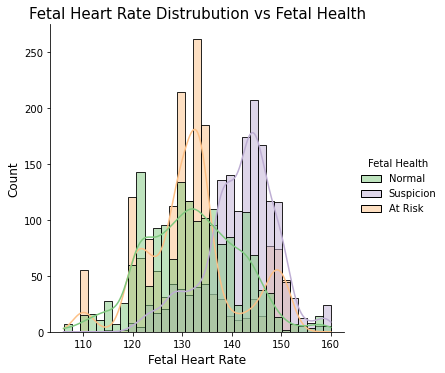

In [67]:
# Checking the relationship between Fetal Heart Rate Distrubution & Fetal Health
sns.set_palette(palette='Accent')
sns.displot(data=DF, x='baseline value', hue='Fetal Health',hue_order=('Normal','Suspicion','At Risk'), kde=True)
plt.title('Fetal Heart Rate Distrubution vs Fetal Health',fontsize=15)
plt.xlabel("Fetal Heart Rate",fontsize=12)
plt.ylabel('Count',fontsize=12)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 [Text(0, 0.5, 'baseline value'),
  Text(0, 1.5, 'accelerations'),
  Text(0, 2.5, 'fetal_movement'),
  Text(0, 3.5, 'uterine_contractions'),
  Text(0, 4.5, 'light_decelerations'),
  Text(0, 5.5, 'severe_decelerations'),
  Text(0, 6.5, 'prolongued_decelerations'),
  Text(0, 7.5, 'abnormal_short_term_variability'),
  Text(0, 8.5, 'mean_value_of_short_term_variability'),
  Text(0, 9.5, 'percentage_of_time_with_abnormal_long_term_variability'),
  Text(0, 10.5, 'mean_value_of_long_term_variability'),
  Text(0, 11.5, 'histogram_width'),
  Text(0, 12.5, 'histogram_min'),
  Text(0, 13.5, 'histogram_max'),
  Text(0, 14.5, 'histogram_number_of_peaks'),
  Text(0, 15.5, 'histogram_number_of_zeroes'),
  Text(0, 16.5, 'histogram_mode'),
  Text(0, 17.5, 'histogram_mean'),
  Text(0, 18.5, 'histogram_median'),
  Text(0, 19.5, 'histogram_variance'),
  Text(0, 20

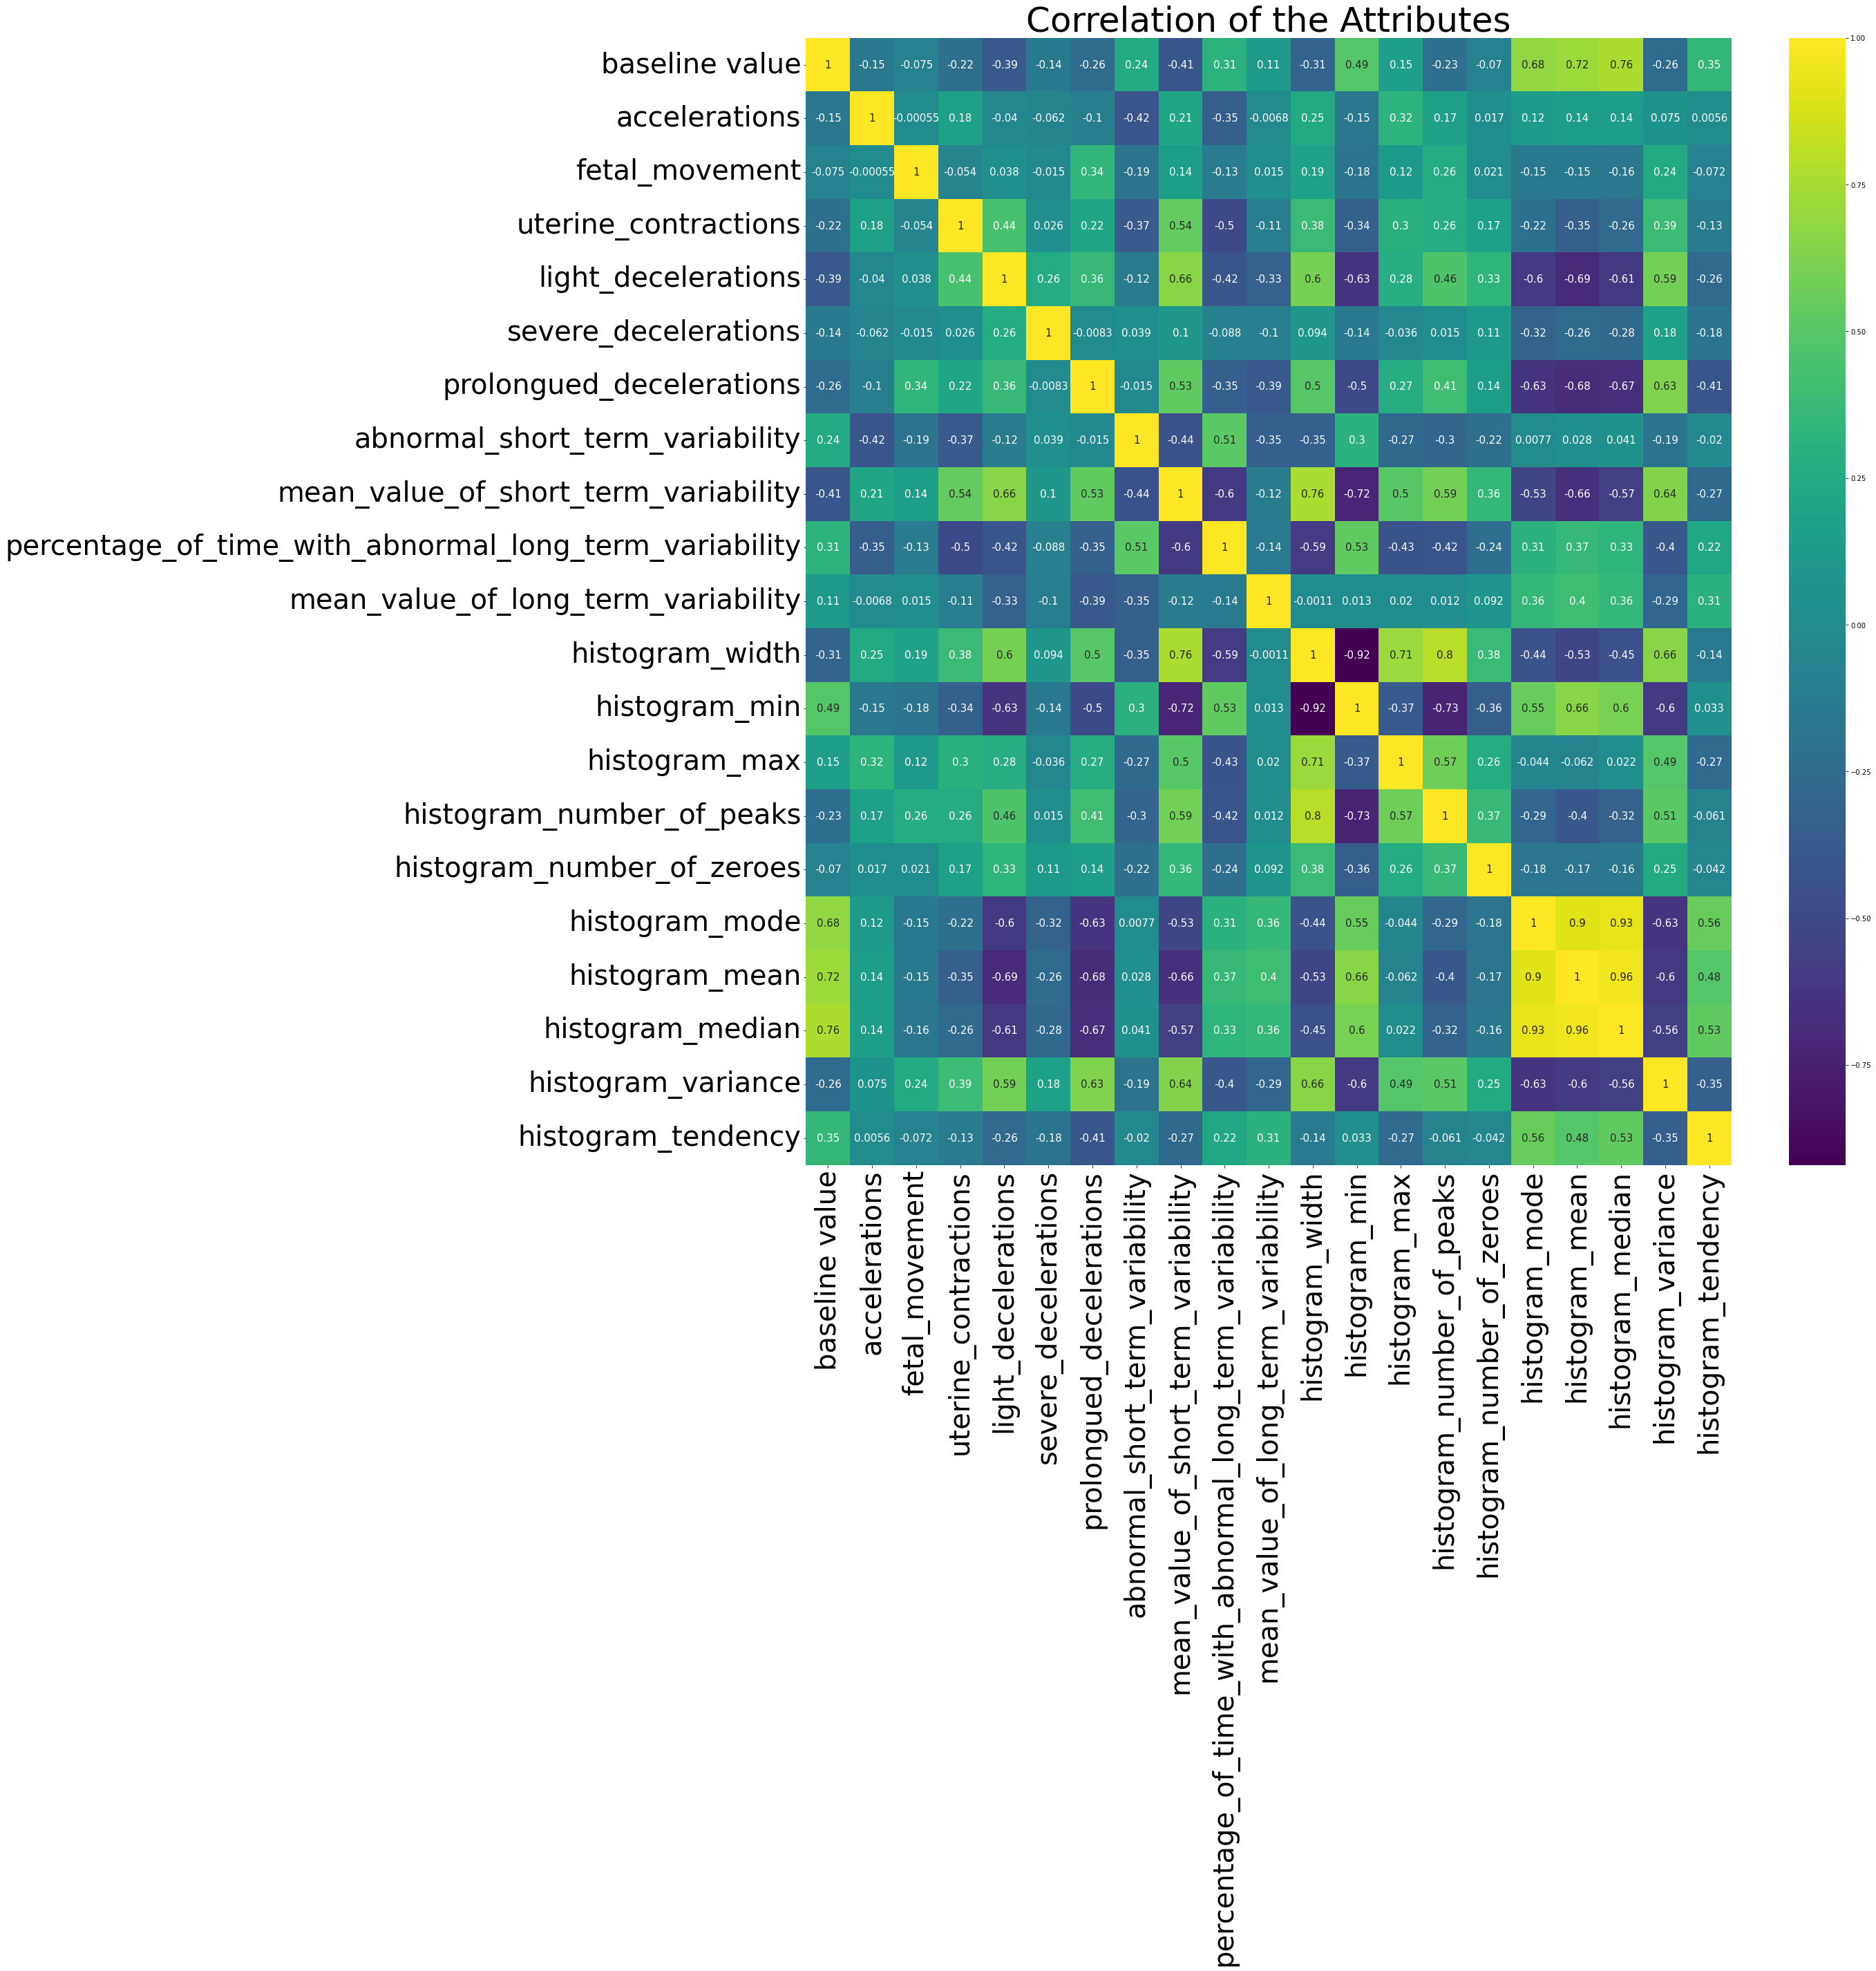

In [68]:
# Visualization of data correlation using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(DF.corr(), annot=True, annot_kws={'size': 15},cmap="viridis")
plt.title('Correlation of the Attributes',fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

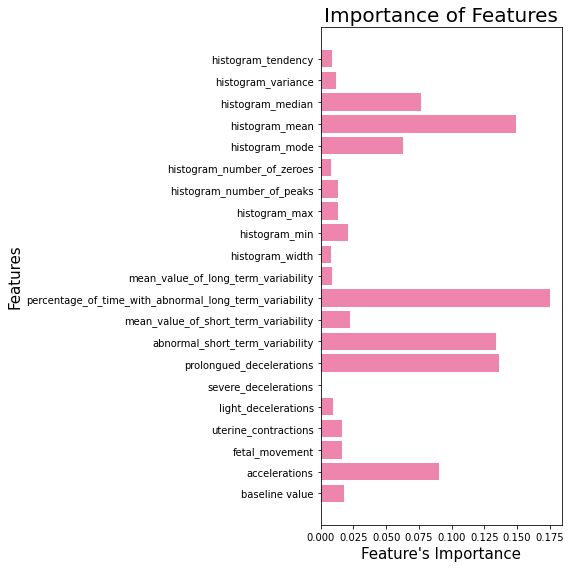

In [69]:
# Plotting Feature's Importance
def plot_feature_importances(model):
    n_features = x_train.shape[1]
    plt.figure(figsize=(8,8))
    sns.set_palette(palette="RdPu_d")
    plt.title('Importance of Features',fontsize=20)
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), x_train.columns.values) 
    plt.xlabel("Feature's Importance",fontsize=15)
    plt.ylabel('Features',fontsize=15)

plot_feature_importances(xgb)
plt.tight_layout()
plt.savefig('Feature.png')

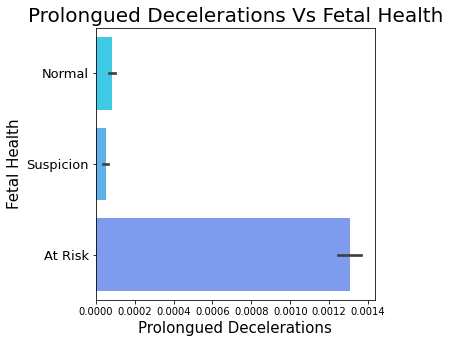

In [71]:
# Checking the relatinship between Prolongued Decelerations & Fetal Health
sns.set_palette(palette='cool')
sns.barplot(x='prolongued_decelerations',y='Fetal Health', data=DF)
y = [0,1,2]
labels = ['Normal', 'Suspicion','At Risk']
plt.yticks(y, labels,fontsize=13)
plt.title('Prolongued Decelerations Vs Fetal Health',fontsize=20)
plt.gcf().set_size_inches(5,5)
plt.ylabel('Fetal Health',fontsize=15)
plt.xlabel('Prolongued Decelerations',fontsize=15)
plt.show()

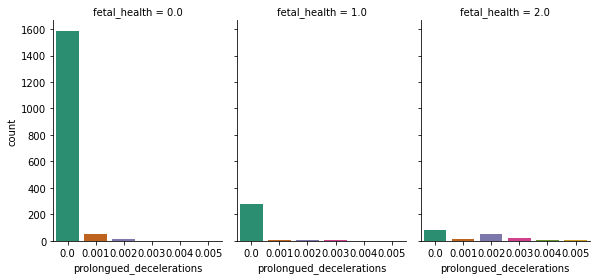

In [72]:
# Checking the relatinship between Prolongued Decelerations & each Class of Fetal Health
sns.set_palette(palette='Dark2')
sns.catplot(x="prolongued_decelerations", col="fetal_health",
                data=df, kind="count",
                height=4, aspect=0.7)

Text(0.5, 1.0, 'Mean Value of Short-Term and Long-Term Variability in FHR')

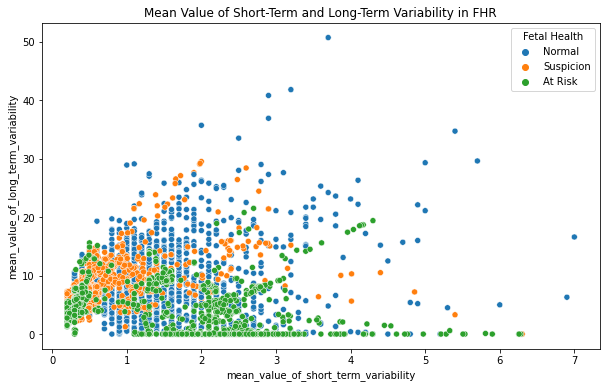

In [73]:
# Creating a scatter plot for sample from each class
sns.set_palette(palette="tab10")
plt.figure(figsize=(10,6))
sns.scatterplot(x="mean_value_of_short_term_variability", y="mean_value_of_long_term_variability", hue='Fetal Health', hue_order=('Normal','Suspicion','At Risk'), data=DF)
plt.title('Mean Value of Short-Term and Long-Term Variability in FHR')